<a href="https://colab.research.google.com/github/pranamyasin/projects/blob/main/ANN_classification_Breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from numpy.random import seed

In [72]:
data = pd.read_csv("/content/drive/MyDrive/collab/breastcancer.csv")

In [73]:
df= pd.DataFrame(data)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [74]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [75]:
df.info()  #No null value is present, all the values are in float form 3except the Id(integer) and diagnosis(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [76]:
#Our main focus is on the diagnosis which is either the tumor/cancer is benign or malignant

In [77]:
diagnosis_column = df[["diagnosis"]]

In [78]:
df['diagnosis_encoded']=LabelEncoder().fit_transform(df.diagnosis)

In [79]:
bC= df.drop(['id','diagnosis'],axis=1)              #Dropped or removed id, since it has no impact on the data set and diagnosis is removed since it has been encoded to new column "diagnosis_encoded"
bC

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [80]:
bC.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


In [81]:
bC= df.drop(['id','diagnosis','perimeter_mean','radius_mean','area_worst','perimeter_worst','radius_worst','concave points_mean'],axis=1)                  

In [82]:
#Dropped 'perimeter_mean','radius_mean','area_worst','perimeter_worst','radius_worst'- since they were highly correlated to area_mean (IN RANGE OF 0.9)
#Dropped 'concave points_mean' - since it was highly related with concave_mean (IN RANGE OF 0.9)

In [83]:
 # The above parameters were dropped and only one of the highly correlated parameter was kept in order to avoid multicollinearity

In [84]:
bC

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,10.38,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,8.589,...,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,17.77,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,3.398,...,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,21.25,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,4.585,...,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,20.38,386.1,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,3.445,...,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,14.34,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,5.438,...,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,7.673,...,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,28.25,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,5.203,...,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,28.08,858.1,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,3.425,...,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,29.33,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,5.772,...,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [85]:
bC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   texture_mean             569 non-null    float64
 1   area_mean                569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   radius_se                569 non-null    float64
 8   texture_se               569 non-null    float64
 9   perimeter_se             569 non-null    float64
 10  area_se                  569 non-null    float64
 11  smoothness_se            569 non-null    float64
 12  compactness_se           569 non-null    float64
 13  concavity_se             569 non-null    float64
 14  concave points_se        5

In [86]:
train,test=train_test_split(bC)

In [87]:
x = bC.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values 
x  

array([[10.38   ,  0.1184 ,  0.2776 , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [17.77   ,  0.08474,  0.07864, ...,  0.186  ,  0.275  ,  0.08902],
       [21.25   ,  0.1096 ,  0.1599 , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [28.08   ,  0.08455,  0.1023 , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [29.33   ,  0.1178 ,  0.277  , ...,  0.265  ,  0.4087 ,  0.124  ],
       [24.54   ,  0.05263,  0.04362, ...,  0.     ,  0.2871 ,  0.07039]])

In [88]:
y = bC.iloc[:,24].values   
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.70, random_state=5)

In [90]:
x_train

array([[18.66   ,  0.1158 ,  0.1231 , ...,  0.2088 ,  0.39   ,  0.1179 ],
       [12.27   ,  0.09003,  0.06307, ...,  0.107  ,  0.311  ,  0.07592],
       [19.62   ,  0.106  ,  0.1133 , ...,  0.1827 ,  0.3179 ,  0.1055 ],
       ...,
       [21.02   ,  0.123  ,  0.2576 , ...,  0.1964 ,  0.3245 ,  0.1198 ],
       [22.91   ,  0.1155 ,  0.1752 , ...,  0.2034 ,  0.3274 ,  0.1252 ],
       [17.27   ,  0.1089 ,  0.07232, ...,  0.05588,  0.2989 ,  0.0738 ]])

In [91]:
x_train.shape

(398, 23)

In [92]:
sc=StandardScaler() 

In [93]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [94]:
x_train_scaled[0]

array([-0.10714079,  1.3764938 ,  0.40214844,  0.46918779,  1.17311434,
        0.81801357, -0.45573742, -0.5725754 , -0.52647752, -0.41983637,
       -0.14973844, -0.05920841, -0.05072415,  0.10039326, -0.36751711,
       -0.01120257,  0.41437499,  2.03423624,  1.09352373,  1.15507281,
        1.45474568,  1.67340157,  1.92775575])

In [95]:
x_train_scaled[0].shape                 #23 inputs are present

(23,)

In [96]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, activation='relu',input_shape=x_train_scaled[0].shape))     #Dense neurons are taken in form of power of 2
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [97]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

In [98]:
tf.random.set_seed(0)  

In [99]:
model_fit = model.fit(x_train_scaled,y_train,validation_data=(x_test,y_test),epochs= 1000,validation_split=0.05,
                      callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30))   

Epoch 1/1000
12/12 [==============================] - 1s 17ms/step - loss: 0.8960 - accuracy: 0.4418 - val_loss: 0.6387 - val_accuracy: 0.6000
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.7709 - accuracy: 0.5529 - val_loss: 0.5820 - val_accuracy: 0.7000
Epoch 3/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.6471 - accuracy: 0.6296 - val_loss: 0.5387 - val_accuracy: 0.8000
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.6277 - accuracy: 0.6270 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5733 - accuracy: 0.6825 - val_loss: 0.4711 - val_accuracy: 0.8000
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.5307 - accuracy: 0.7487 - val_loss: 0.4449 - val_accuracy: 0.8000
Epoch 7/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.4875 - accuracy: 0.7672 - val_loss: 0.4203 - val_accuracy: 0.8500
Epoch

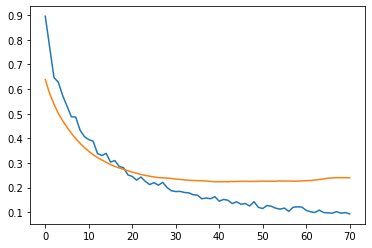

In [100]:
pd.Series(model_fit.history['loss']).plot(kind='line')
pd.Series(model_fit.history['val_loss']).plot(kind='line') 

In [101]:
y_pred = model.predict(x_test_scaled)
y_pred.reshape(1,-1)

array([[9.9993253e-01, 2.6785523e-02, 9.9836588e-03, 2.4701387e-02,
        2.1485299e-02, 9.9997956e-01, 4.8061997e-02, 6.4024329e-04,
        7.7805191e-02, 1.3079584e-02, 1.8154943e-01, 1.7929006e-01,
        9.9999970e-01, 1.5857163e-01, 1.7749965e-03, 3.0609965e-04,
        4.1136289e-01, 2.5815666e-03, 2.0283759e-03, 7.5517297e-03,
        9.0436137e-01, 1.2734532e-03, 2.1259487e-03, 3.8093150e-02,
        1.2593603e-01, 4.5056343e-03, 2.4097991e-01, 9.9999762e-01,
        4.9202889e-02, 9.9981630e-01, 9.9999928e-01, 9.8258430e-01,
        4.5732355e-01, 9.9803603e-01, 9.5781684e-04, 9.3886256e-04,
        9.6247697e-01, 1.7917037e-02, 5.6138635e-03, 9.9982095e-01,
        1.6267192e-01, 6.2803626e-03, 3.0413270e-04, 9.9885881e-01,
        1.0277480e-02, 3.8692802e-02, 9.9998653e-01, 9.8994005e-01,
        1.6911894e-02, 1.0000000e+00, 1.4918447e-03, 1.3676664e-05,
        3.0423105e-03, 2.8435951e-01, 4.1563064e-02, 9.9999118e-01,
        9.9092597e-01, 9.9853945e-01, 6.8836212e

In [102]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [103]:
r2_score(y_test,y_pred)     

0.8658226419840405

In [104]:
mean_squared_error(y_test,y_pred)

0.030789989134676937

In [105]:
#Model is 86% ACCURATE and has 3% error